# Lab 6 - Data Visualization with Seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## NFL Offense Data

1. Import the NFL week 3-7 data and add a week column to dataset and set the value to the given week (e.g. 3 )for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Next, merge the division and abbreviation data to this dataframe so that the division and conference info is included (using  team_colors_logos.csv or nfl_teams.csv).

Reading dataframes

In [2]:
week3 = pd.read_csv('nfloffenseweek3.csv')
week4 = pd.read_csv('nfloffenseweek4.csv')
week5 = pd.read_csv('nfloffenseweek5.csv')
week6 = pd.read_csv('nfloffenseweek6.csv')
week7 = pd.read_csv('nfloffenseweek7.csv')

nfl_teams = pd.read_csv('nfl_teams.csv')
colors = pd.read_csv('teams_colors_logos.csv')

Adding week column

In [3]:
week3['week'] = 3
week4['week'] = 4
week5['week'] = 5
week6['week'] = 6
week7['week'] = 7

merging dataframes

In [4]:
df = pd.concat([week3,week4,week5,week6,week7])
df

,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,...,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,week
0,1,Baltimore Ravens,3,99,1141,166,6.9,3,1,55,...,2,5.6,18,8,44,5,42.9,8.6,35.63,3
1,2,Detroit Lions,3,95,1227,203,6.0,2,0,63,...,5,5.9,20,15,129,5,40.5,5.4,31.05,3
2,3,Buffalo Bills,3,91,1324,213,6.2,5,3,77,...,1,4.7,22,20,136,6,46.7,16.7,47.46,3
3,4,Kansas City Chiefs,3,88,1122,180,6.2,3,2,68,...,2,4.1,15,15,124,8,45.2,6.5,40.73,3
4,5,Philadelphia Eagles,3,86,1341,208,6.4,1,0,73,...,6,4.4,26,23,173,6,39.4,3.0,45.06,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,28,Indianapolis Colts,7,113,2391,481,5.0,14,5,147,...,2,3.5,35,42,347,9,30.3,18.4,-24.15,7
28,29,Pittsburgh Steelers,7,107,2090,436,4.8,12,3,126,...,4,3.7,34,42,298,8,26.9,12.8,-29.12,7
29,30,Houston Texans,6,106,1860,358,5.2,6,1,104,...,3,4.4,35,33,265,13,32.8,9.0,-9.67,7
30,31,Los Angeles Rams,6,104,1859,375,5.0,13,5,115,...,5,3.4,24,24,205,9,32.3,21.0,-15.68,7


Renaming columns to merge

In [5]:
nfl_teams.columns = ['ID', 'team', 'Abbreviation', 'Conference', 'Division']


Renaming Rows

In [6]:
nfl_teams["team"] = nfl_teams["team"].replace("NY Giants", "New York Giants")
nfl_teams["team"] = nfl_teams["team"].replace("NY Jets", "New York Jets")
nfl_teams["team"] = nfl_teams["team"].replace("Washington Football Team", "Washington Commanders")

Merging

In [7]:
df = pd.merge(df, nfl_teams, on='team', how='outer')
df

,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,...,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,week,ID,Abbreviation,Conference,Division
0,1,Baltimore Ravens,3,99,1141,166,6.9,3,1,55,...,44,5,42.9,8.6,35.63,3,3,BAL,AFC,North
1,3,Baltimore Ravens,4,119,1437,230,6.2,5,1,77,...,114,7,42.2,11.1,32.97,4,3,BAL,AFC,North
2,4,Baltimore Ravens,5,138,1762,291,6.1,6,1,99,...,162,9,43.6,10.9,36.86,5,3,BAL,AFC,North
3,4,Baltimore Ravens,6,158,2168,349,6.2,8,2,122,...,236,9,43.8,12.5,42.86,6,3,BAL,AFC,North
4,3,Baltimore Ravens,7,181,2422,412,5.9,9,3,139,...,289,10,44.6,12.2,44.44,7,3,BAL,AFC,North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,32,Indianapolis Colts,3,40,994,207,4.8,6,2,61,...,153,4,22.9,17.1,-22.10,3,14,IND,AFC,South
156,32,Indianapolis Colts,4,57,1359,270,5.0,9,4,82,...,203,5,25.0,20.5,-18.74,4,14,IND,AFC,South
157,32,Indianapolis Colts,5,69,1665,343,4.9,11,4,101,...,267,6,26.3,19.3,-33.65,5,14,IND,AFC,South
158,25,Indianapolis Colts,6,103,2099,417,5.0,11,4,130,...,319,9,31.8,16.7,-11.67,6,14,IND,AFC,South


2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

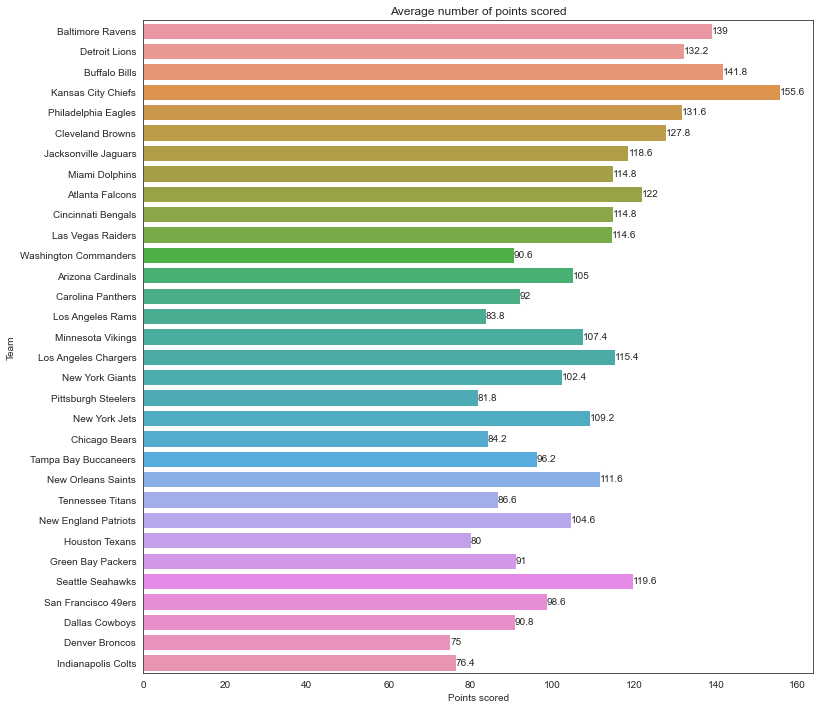

In [16]:
figure, axis = plt.subplots(figsize=(12, 12));
sns.set_style('white')
sns.barplot(y=df.team, x=df.points_scored, ci=False);
plt.xlabel("Points scored");
plt.ylabel("Team");
plt.title("Average number of points scored");
axis.bar_label(axis.containers[0]);


3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

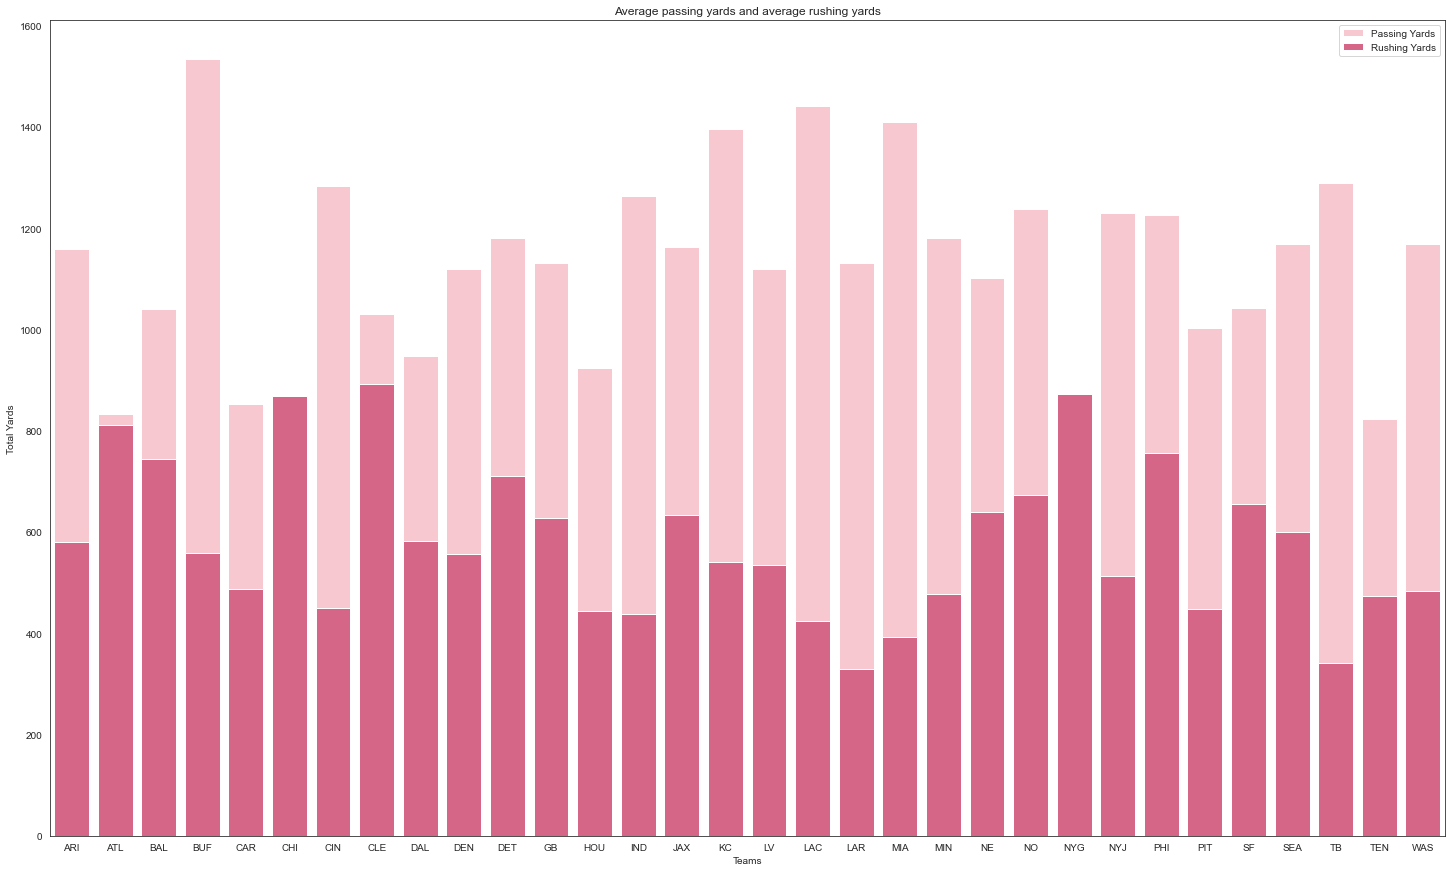

In [22]:
figure, axis = plt.subplots(figsize=(25, 15));
sns.barplot(x=df.groupby('team')['Abbreviation'].first(), y=df.groupby('team')['passing_yards'].mean(), label="Passing Yards", color='pink');
sns.barplot(x=df.groupby('team')['Abbreviation'].first(), y=df.groupby('team')['rushing_yards'].mean(), label="Rushing Yards", color='#e75480');
axis.legend();
plt.ylabel("Total Yards");
plt.xlabel("Teams");
plt.title("Average passing yards and average rushing yards");


4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

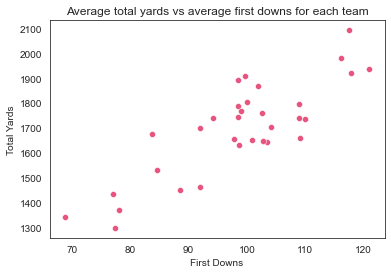

In [19]:
sns.set_style('white')
sns.set_palette("colorblind")
sns.scatterplot(x=df.groupby('team')['1st_downs'].mean(), y=df.groupby('team')['total_yards'].mean(), color='#e75480');
plt.xlabel("First Downs")
plt.ylabel("Total Yards")
plt.title("Average total yards vs average first downs for each team");

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

Text(0.5, 1.0, 'Penalty yards for the BA Ravens and LA Rams for each week')

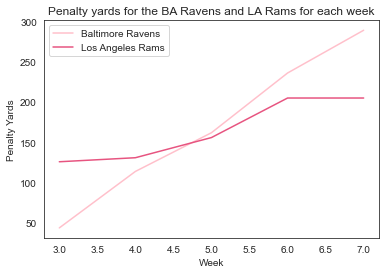

In [18]:
sns.set_style('white')
sns.lineplot(x=df[(df.team == 'Baltimore Ravens')].week, y=df[(df.team == 'Baltimore Ravens')].penalty_yards, label='Baltimore Ravens', color='pink');
sns.lineplot(x=df[(df.team == 'Los Angeles Rams')].week, y=df[(df.team== 'Los Angeles Rams')].penalty_yards,label='Los Angeles Rams', color='#e75480');
plt.xlabel("Week");
plt.ylabel("Penalty Yards")
plt.title("Penalty yards for the BA Ravens and LA Rams for each week")

6. Plot the average total points vs average yards per play for each team as a scatter plot (with total points on the y-axis and yards per play on the x-axis).

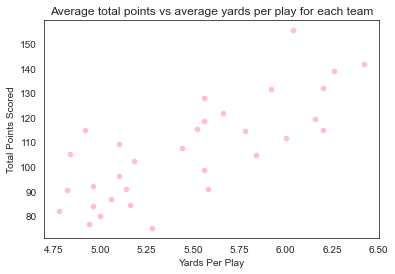

In [12]:
sns.set_style('white')
sns.scatterplot(x=df.groupby('team')['yards_per_play'].mean(), y=df.groupby('team')['points_scored'].mean(), color='pink');
plt.xlabel("Yards Per Play");
plt.ylabel("Total Points Scored");
plt.title("Average total points vs average yards per play for each team");

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

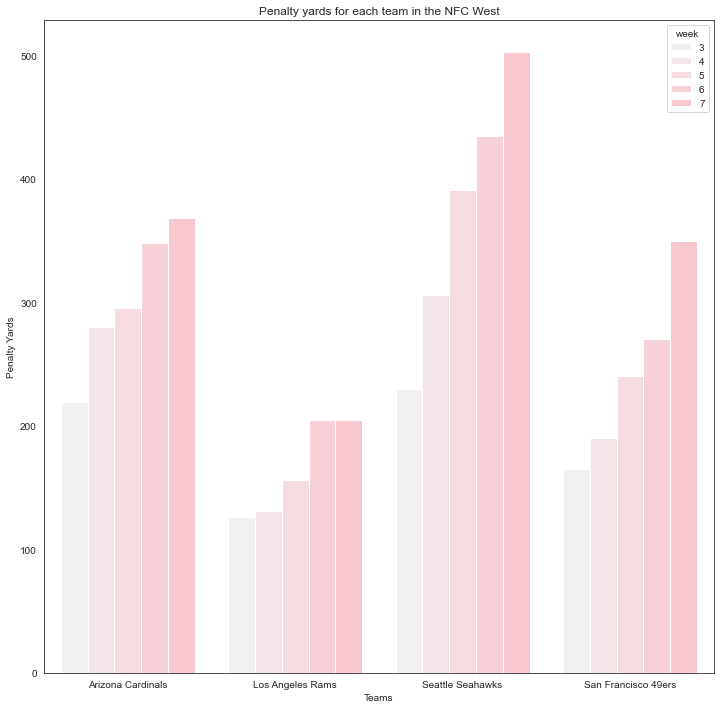

In [23]:
figure, axis = plt.subplots(figsize=(12, 12));
sns.barplot(x=df[(df.Conference=='NFC') & (df.Division == "West")].team, y=df[(df.Conference=='NFC') & (df.Division == "West")].penalty_yards, hue=df[(df.Conference=='NFC') & (df.Division == "West")].week, color='pink');
plt.ylabel("Penalty Yards")
plt.xlabel("Teams")
plt.title("Penalty yards for each team in the NFC West");

8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

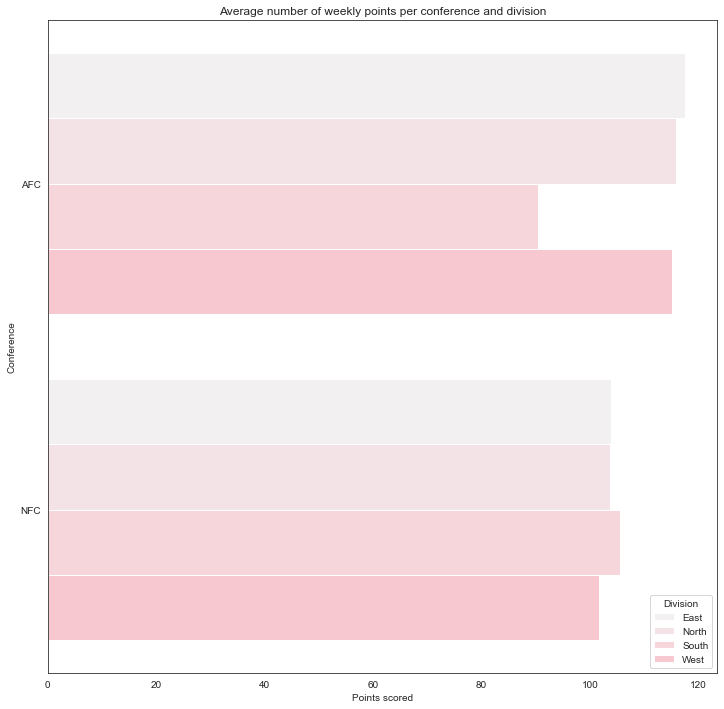

In [14]:
figure, axis = plt.subplots(figsize=(12, 12));
sns.barplot(x=df.groupby(['Conference','Division'])['points_scored'].mean(), y=df.groupby(['Conference','Division'])['Conference'].first(), hue=df.groupby(['Conference','Division'])['Division'].first(), color='pink');
plt.xlabel("Points scored");
plt.title("Average number of weekly points per conference and division");